In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from typing import Sequence

In [3]:
NUM_OUTPUTS = 1
path_template = 'data{div}{{file}}'.format(div=os.path.sep)

In [4]:
def scale_dataframe(
    df: pd.DataFrame, cols: Sequence[str] = None, new_max: int = 1, new_min: int = -1
) -> None:
    cols = cols or df.columns
    for col in cols:
        col_max = df[col].max()
        col_min = df[col].min()
        df[col] = new_min + ((df[col] - col_min) * (new_max - new_min)) / (
            col_max - col_min
        )
        assert df[col].min() == new_min
        assert df[col].max() == new_max

def read_csv(path: str, scale: bool = False, **kwargs) -> pd.DataFrame:
    drop_cols = [f"y{i}" for i in range(NUM_OUTPUTS, 48)]  # drop unnecessary outputs
    drop_cols.append("Unnamed: 0")
    df = pd.read_csv(path)
    df.drop(columns=drop_cols, inplace=True)

    if scale:
        print(f"Scaling {path} . . .")
        input_cols = [f"x{i}" for i in range(96)]
        scale_dataframe(df, input_cols, **kwargs)

    return df

## Load the csv files

## Scaled plots

Scaling data/amarillo_norm_train.csv . . .
Scaling data/amarillo_sky_train.csv . . .


Text(0, 0.5, 'Irradiance W/m**2')

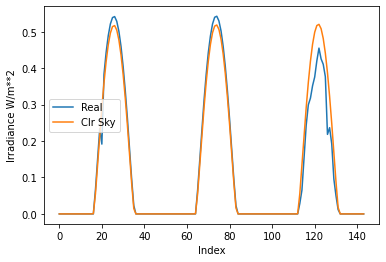

In [5]:
df_train = read_csv(path_template.format(file='amarillo_norm_train.csv'), scale=True, new_min = 0, new_max = 1)
df_sky_train = read_csv(path_template.format(file='amarillo_sky_train.csv'), scale=True, new_min = 0, new_max = 1)

df_train.iloc[0:48*3]['x0'].plot(label='Real')
df_sky_train.iloc[0:48*3]['x0'].plot(label='Clr Sky')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Irradiance W/m**2')

Scaling data/amarillo_norm_train.csv . . .
Scaling data/amarillo_sky_train.csv . . .


Text(0, 0.5, 'Irradiance W/m**2')

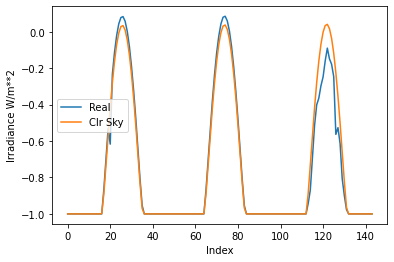

In [6]:
df_train = read_csv(path_template.format(file='amarillo_norm_train.csv'), scale=True, new_min = -1, new_max = 1)
df_sky_train = read_csv(path_template.format(file='amarillo_sky_train.csv'), scale=True, new_min = -1, new_max = 1)

df_train.iloc[0:48*3]['x0'].plot(label='Real')
df_sky_train.iloc[0:48*3]['x0'].plot(label='Clr Sky')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Irradiance W/m**2')

## Plots

In [7]:
df_train = read_csv(path_template.format(file='amarillo_norm_train.csv'), scale=False)
df_train_diff = read_csv(path_template.format(file='amarillo_diff_train.csv'), scale=False)
df_sky_train = read_csv(path_template.format(file='amarillo_sky_train.csv'), scale=False)

Text(0, 0.5, 'Irradiance W/m**2')

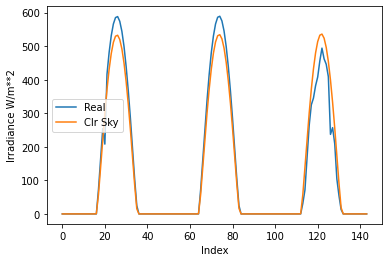

In [8]:
df_train.iloc[0:48*3]['x0'].plot(label='Real')
df_sky_train.iloc[0:48*3]['x0'].plot(label='Clr Sky')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Irradiance W/m**2')

Text(0, 0.5, 'Irradiance W/m**2')

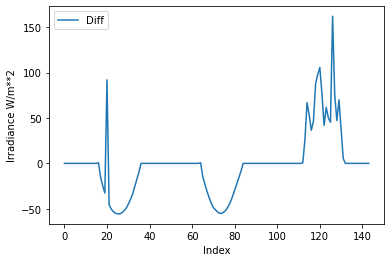

In [9]:
df_train_diff.iloc[0:48*3]['x0'].plot(label='Diff')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Irradiance W/m**2')

### Describe the original training sets
We only need one column, the rest of the columns are the same (just shifted).

In [10]:
df_train.describe()['x0']
# count = number of measurements (not None values)

count    366577.000000
mean        223.632623
std         308.981564
min           0.000000
25%           0.000000
50%           0.000000
75%         430.000000
max        1086.000000
Name: x0, dtype: float64

In [11]:
df_train_diff.describe()['x0']

count    366577.000000
mean         31.130524
std         106.783096
min        -105.115151
25%           0.000000
50%           0.000000
75%           7.306644
max         962.349784
Name: x0, dtype: float64

In [12]:
# Number of negative readings
(df_train_diff<0).sum()['x0']

75005

In [13]:
# Percentage of negative differences
(df_train_diff<0).sum()['x0'] / df_train_diff.count()['x0'] * 100

20.460912714109178

In [14]:
days = []
days_magnitude = []

for day in range(0, len(df_train_diff)//48 - 1):
    # num of negative differences per day
    batch = df_train_diff.iloc[day*48:(day+1)*48]['x0']
    days.append((batch < 0).sum())

    # magnitude of all differences
    filt = batch < 0
    days_magnitude.extend(batch[filt].values)


Text(0, 0.5, 'Number of days')

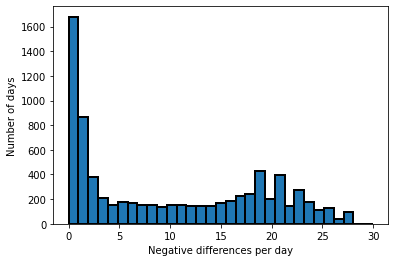

In [15]:
plt.hist(days, bins=31, edgecolor='black', linewidth=2)
plt.xlabel('Negative differences per day')
plt.ylabel('Number of days')

Text(0, 0.5, 'Count')

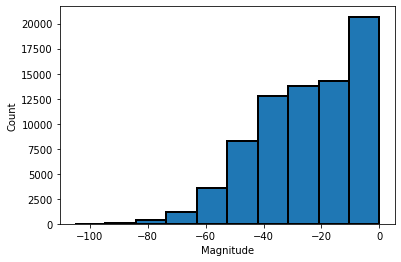

In [16]:
plt.hist(days_magnitude, edgecolor='black', linewidth=2)
plt.xlabel('Magnitude')
plt.ylabel('Count')